In [2]:
import pyshark
from os import path, sys, walk
import subprocess
from time import sleep
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess

In [3]:
#get all path of .pcap file
cnt = 0
paths_pcap = []
for f in walk(sys.path[0]):
    cnt += 1
    folder_name = f[0]
    for iterable in f:
        if type(iterable) is list:
            for item in iterable:
                if item.split(".")[-1] == 'pcap':
                    file_path = folder_name + "/"+ item
                    paths_pcap.append(file_path)
                    
path.exists(paths_pcap[0])

True

In [4]:
print(len(paths_pcap))

681


In [4]:
#test pyshark
r = pyshark.FileCapture(paths_pcap[0])

In [5]:
paths_pcap[0]

'/Users/kuangwenyi/Documents/Development/activation-camera/invoke.pcap'

In [8]:
def generate_res_path(path):
    res_path = path[:-5] + ".txt"
    return res_path

In [9]:
# process = subprocess.Popen(['tshark', '-r', '/Users/kuangwenyi/Documents/Development/activation-camera/activation-camera/[S2.Ep9] Narcos - Nuestra Finca_00469_00470_echodot_camera_2b/echodot.pcap'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
# out, err = process.communicate()
# # print(out.decode('utf-8'))
# string = out.decode('utf-8').split('\n')
# with open('./test2.txt', "w") as f:
#     for line in string:
#         f.write(line.strip() + '\n')

In [13]:
def generate_result_from_tshark(paths):
    count = 0
    for path in paths:
        process = subprocess.Popen(['tshark', '-r', path], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        
        out, err = process.communicate()
        
        count += 1
        if (count % 100 == 0):
            print(count)
        stringlized = out.decode('utf-8').split('\n')
        res_path = generate_res_path(path)
        with open(res_path, 'w') as f:
            for line in stringlized:
                f.write(line.strip() + '\n')
    return None

In [14]:
# generate_result_from_tshark(paths_pcap)

100
200
300
400
500
600


In [7]:
def get_all_tshark_output_res():
    cnt = 0
    paths_txt = []
    for f in walk(sys.path[0]):
        cnt += 1
        folder_name = f[0]
        for iterable in f:
            if type(iterable) is list:
                for item in iterable:
                    if item.split(".")[-1] == 'txt':
                        if "time" in item:
                            continue
                        if "relative-time" in item:
                            continue
                        if "subtitles" in item:
                            continue
                        file_path = folder_name + "/"+ item
                        paths_txt.append(file_path)
    return paths_txt

In [8]:
len(get_all_tshark_output_res())

681

In [9]:
tsharks_res = get_all_tshark_output_res()

In [33]:
sample_txt = tsharks_res[0]

In [47]:
sample_txt

'/Users/kuangwenyi/Documents/Development/activation-camera/activation-camera/[S2.Ep9] Narcos - Nuestra Finca_00469_00470_echodot_camera_2b/echodot.txt'

In [41]:
with open(sample_txt, 'r') as f:
    length_analysis = {}
    for l in f:
        if l == '\n':
            continue
        length_analysis[len(l.split(' '))] = l

In [43]:
length_analysis

{13: '554  30.558820 1e:f2:0c:cc:ed:1c → AmazonTe_41:4d:35 ARP 60 Who has 192.168.12.114? Tell 192.168.12.254\n',
 11: '89   4.949747 192.168.12.115 → 192.168.12.114 TLSv1.2 112 Application Data\n',
 19: '97   4.955993 192.168.12.114 → 192.168.12.115 TCP 66 60844 → 55443 [ACK] Seq=720 Ack=307 Win=1939 Len=0 TSval=22762 TSecr=22765\n',
 17: '95   4.953883 192.168.12.115 → 192.168.12.114 TLSv1.2 326 Application Data, Application Data, Application Data, Application Data\n',
 12: '718  39.651803 192.168.12.115 → 192.168.12.114 UDP 58 55444 → 55444 Len=16\n',
 10: '617  34.950971 192.168.12.115 → 192.168.12.114 TLSv1.2 112 Application Data\n',
 18: '620  34.974044 192.168.12.114 → 192.168.12.115 TCP 66 60844 → 55443 [ACK] Seq=2877 Ack=1225 Win=2061 Len=0 TSval=25764 TSecr=25765\n',
 16: '619  34.956207 192.168.12.115 → 192.168.12.114 TLSv1.2 326 Application Data, Application Data, Application Data, Application Data\n',
 20: '461  25.467859 52.94.235.50 → 192.168.12.114 TCP 60 [TCP Dup ACK 4

In [61]:
for l, elem in length_analysis.items():
    parsed = []
    idx = 0
    string = ""
    for e in elem.split(' '):
        if e == '' or e == '→':
            continue
        else:
            if idx >= 6:
                string += (" " + e)
            else:
                parsed.append(e)
                idx += 1
    parsed.append(string.strip())
    
#     for idx, e in enumerate(elem.split(' ')):
#         if e == '':
#             continue
#         else:
#             parsed.append((idx, e))
    print(",".join(parsed[1:]))

30.558820,1e:f2:0c:cc:ed:1c,AmazonTe_41:4d:35,ARP,60,Who has 192.168.12.114? Tell 192.168.12.254
4.949747,192.168.12.115,192.168.12.114,TLSv1.2,112,Application Data
4.955993,192.168.12.114,192.168.12.115,TCP,66,60844 55443 [ACK] Seq=720 Ack=307 Win=1939 Len=0 TSval=22762 TSecr=22765
4.953883,192.168.12.115,192.168.12.114,TLSv1.2,326,Application Data, Application Data, Application Data, Application Data
39.651803,192.168.12.115,192.168.12.114,UDP,58,55444 55444 Len=16
34.950971,192.168.12.115,192.168.12.114,TLSv1.2,112,Application Data
34.974044,192.168.12.114,192.168.12.115,TCP,66,60844 55443 [ACK] Seq=2877 Ack=1225 Win=2061 Len=0 TSval=25764 TSecr=25765
34.956207,192.168.12.115,192.168.12.114,TLSv1.2,326,Application Data, Application Data, Application Data, Application Data
25.467859,52.94.235.50,192.168.12.114,TCP,60,[TCP Dup ACK 460#1] 443 46649 [ACK] Seq=47 Ack=47 Win=2872 Len=0


In [56]:
protocols = set(["ARP", "TLSv1.2", 'TCP', 'UDP'])

In [49]:
protocols

{'ARP', 'TCP', 'TLSv1.2', 'UDP'}

In [17]:
def convert_plain_to_csv(plain_line):
    parsed = []
    idx = 0
    string = ""
    for e in plain_line.split(' '):
        if e == '' or e == '→':
            continue
        else:
            if idx >= 6:
                string += (" " + e)
            else:
                parsed.append(e)
                idx += 1
    parsed.append(string.strip().replace('\n', '').replace(',', '')+ '\n')
    return ",".join(parsed[1:])

In [18]:
length_analysis.keys()

NameError: name 'length_analysis' is not defined

In [85]:
convert_plain_to_csv(length_analysis[11])

'4.949747,192.168.12.115,192.168.12.114,TLSv1.2,112,Application Data\n'

In [19]:
def generate_csv_path(tshark_paths):
    res = []
    for path in tshark_paths:
        res.append(path[:-3] + 'csv')
    return res, tshark_paths

In [20]:
'/Users/kuangwenyi/Documents/Development/activation-camera/activation-camera/[S2.Ep9] Narcos - Nuestra Finca_00469_00470_echodot_camera_2b/echodot.txt'[:-3]

'/Users/kuangwenyi/Documents/Development/activation-camera/activation-camera/[S2.Ep9] Narcos - Nuestra Finca_00469_00470_echodot_camera_2b/echodot.'

In [23]:
def convert_plain_txt_to_csv(tshark_res):
    columns = ['time', 'source', 'destination', 'protocol', 'length', 'Info']
    cnt = 0
    target_csv_paths, tshark_plain_paths = generate_csv_path(tsharks_res)
    for csv_path, plain_path in zip(target_csv_paths, tshark_plain_paths):
        cnt += 1
        if cnt % 100 == 0:
            print(cnt)
        with open(csv_path, 'w') as csv:
            csv.write(",".join(columns) + '\n')
            with open(plain_path, 'r') as plain:
                for line in plain:
                    if line == '\n' or line == '':
                        continue
                    csv_line = convert_plain_to_csv(line)
                    csv.write(csv_line)
    return

In [24]:
%%time
convert_plain_txt_to_csv(tsharks_res)

100
200
300
400
500
600
CPU times: user 2.92 s, sys: 424 ms, total: 3.34 s
Wall time: 3.78 s


# EDA

In [11]:
csv_paths, _ = generate_csv_path(tsharks_res)

In [12]:
len(csv_paths)

681

In [29]:
df = pd.read_csv(csv_paths[0])

In [30]:
df

,time,source,destination,protocol,length,Info
0,0.000000,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8
1,0.001368,192.168.12.115,192.168.12.114,UDP,58,55444 55444 Len=16
2,0.040974,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8
3,0.042084,192.168.12.115,192.168.12.114,UDP,58,55444 55444 Len=16
4,0.092924,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8
...,...,...,...,...,...,...
713,39.566676,192.168.12.115,192.168.12.114,UDP,58,55444 55444 Len=16
714,39.613302,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8
715,39.621260,192.168.12.115,192.168.12.114,UDP,58,55444 55444 Len=16
716,39.650686,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8


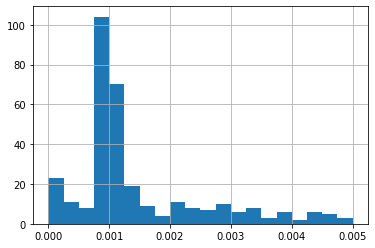

In [40]:
df['time'].diff().hist(bins=20, range=(0,0.005))

In [42]:
csv_paths[0]

'/Users/kuangwenyi/Documents/Development/activation-camera/activation-camera/[S2.Ep9] Narcos - Nuestra Finca_00469_00470_echodot_camera_2b/echodot.csv'